In [2]:
from tensor import Tensor
import numpy as np
import nn
import torch
from sklearn import datasets

In [3]:
## Does it work in simple contexts?

xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

ys = [[1.0], 
      [-1.0], 
      [-1.0], 
      [1.0]]



net = nn.MLP()

optim = nn.SGD(net.parameters(), lr=0.005, momentum=0.9)

x = Tensor(xs)
y_real = Tensor(ys)

for k in range(10000):
    optim.zero_grad()
    y_pred = net(x)
    loss = ((y_pred - y_real)**2).mean(0)
    loss.backward()
    optim.step()
    if k % 200 == 0:
        print(k, loss.data)
    
y_pred

TypeError: MLP.__init__() missing 2 required positional arguments: 'n_in' and 'n_out'

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [3]:
from sklearn import datasets

In [11]:
datasets.make_regression(n_samples=200, n_features=2, noise=0.01)

(array([[-0.37988947,  0.05099247],
        [ 0.58493451, -0.798081  ],
        [ 1.04167054,  0.74203373],
        [-2.86375784,  0.58412593],
        [ 1.03509501,  0.47722211],
        [ 0.537244  ,  1.18953602],
        [ 0.59130794, -0.73619249],
        [ 0.34538168, -0.0382666 ],
        [-1.11921492,  1.06750063],
        [ 0.88444262,  1.47938184],
        [-0.02414129,  0.74867554],
        [-0.69657555, -0.86273344],
        [-2.35665649,  0.42522904],
        [ 1.300929  , -2.67400544],
        [-2.37987777,  0.01012245],
        [-0.82709791, -1.7800778 ],
        [-1.37558475, -0.40835085],
        [-1.09512129, -1.5971113 ],
        [-1.50145152, -0.8248431 ],
        [ 0.12458102, -1.38277224],
        [ 0.8473867 ,  0.84127458],
        [ 0.69786211, -0.50552855],
        [ 0.58246639, -0.2890588 ],
        [ 0.79505177,  0.32554748],
        [ 0.56900632,  0.2725109 ],
        [ 1.33618627,  0.30505305],
        [ 0.09898389, -0.18741819],
        [-0.11827806,  0.007

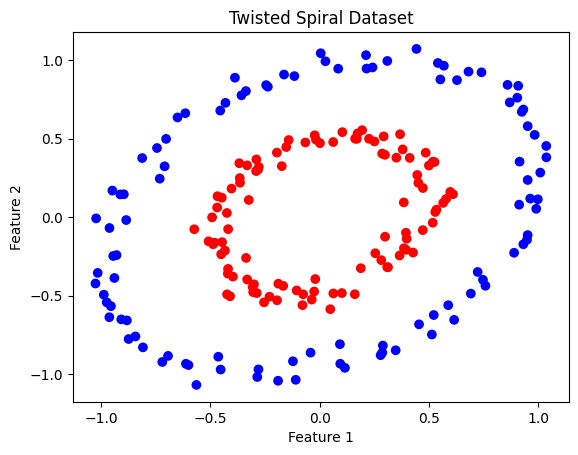

NameError: name 'Tensor' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def generate_twisted_spiral(n_samples, noise=0.05, factor=0.5):
    """
    Generates a spiral dataset using the make_circles function from scikit-learn,
    then 'twists' it to resemble a spiral.
    :param n_samples: int, total number of points
    :param noise: float, standard deviation of Gaussian noise
    :param factor: float, scale factor between inner and outer circle
    :return: tuple, features (X) and labels (y)
    """
    X, y = make_circles(n_samples=n_samples, factor=factor, noise=noise, random_state=42)
    Y = y * 2 - 1  # Adjust labels to be -1 and 1

    # Apply a transformation to twist the circles into spirals
    transformation = np.array([[0.6, -0.6], [0.8, 0.8]])
    X = np.dot(X, transformation)

    return X, Y

# Generate the data
n_samples = 200
X, Y = generate_twisted_spiral(n_samples)

# Plotting the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Twisted Spiral Dataset")
plt.show()

# Convert the data for your neural network
xs = X.tolist()
ys = [[y] for y in Y.tolist()]


x = Tensor(xs)
y_real = Tensor(ys)

In [3]:
y_real.shape

(200, 1)

In [64]:
def kaiming_uniform(shape, gain=np.sqrt(2)):
    """
    Kaiming Uniform initialization (He initialization) for weight matrices.

    Args:
    shape (tuple): The shape of the weight matrix.
    gain (float): The scaling factor (recommended sqrt(2) for ReLU).

    Returns:
    numpy.ndarray: The initialized weights.
    """
    print(shape[:-1])
    fan_in = np.prod(shape[:-1])  # Product of dimensions except the last dimension
    std = gain / np.sqrt(fan_in)  # Calculate standard deviation
    limit = np.sqrt(3.0) * std  # Calculate limit for uniform distribution

    return np.random.uniform(-limit, limit, size=shape)

In [65]:
kaiming_uniform((1, 30)).std()

(1,)


1.3609795497380417

In [58]:
div = 1. / np.sqrt(1)

np.random.uniform(-div, div, (30, 1)).std()

0.5480296227365216

In [42]:
def kaiming_uniform_np(in_features, out_features):
    tensor = torch.empty(out_features, in_features)
    torch.nn.init.kaiming_uniform_(tensor, a=0)
    return tensor

kaiming_uniform_np(1, 30).std()

tensor(1.3837)

In [24]:
Tensor.kaiming_uniform(1, 30).data.std()

2.0763154

In [45]:
torch.nn.Linear(1, 30).weight.data.std()

tensor(0.6320)

In [2]:
import torch

In [8]:
X, y = datasets.make_regression(n_samples=200, n_features=1, noise=0.01)
y.reshape(-1, 1)

array([[ 1.34808479e+01],
       [ 1.95015536e+01],
       [ 9.26908849e+00],
       [-7.11581725e+01],
       [ 3.82720009e+01],
       [-2.02885994e+01],
       [-4.51040988e+01],
       [-2.99703446e+00],
       [-5.36353356e+01],
       [ 2.99604916e+01],
       [ 2.50319926e+01],
       [ 1.04251160e+01],
       [ 2.14645088e+01],
       [-1.32464234e+01],
       [ 6.29139272e+01],
       [ 9.49373062e+01],
       [ 2.41986366e+00],
       [ 2.49414707e+01],
       [ 5.90874473e+01],
       [-1.32988455e+01],
       [-4.08545268e+01],
       [ 5.01039319e+01],
       [ 9.43388459e+01],
       [ 1.31495079e+01],
       [ 2.87668639e+01],
       [-8.99283457e+01],
       [ 5.16602512e+01],
       [-8.32871601e+01],
       [ 2.80392787e+01],
       [-5.47252391e+01],
       [ 4.75007538e+00],
       [ 1.42287816e+01],
       [-3.92285690e+01],
       [ 3.04828626e+01],
       [-4.81688788e+01],
       [ 2.85847082e+00],
       [ 1.83038978e+01],
       [ 4.37668251e+01],
       [-1.2

In [7]:
import nn
from tensor import Tensor
# Generate the data
# n_samples = 200
X, y = datasets.make_regression(n_samples=1000, n_features=100, noise=0.01)
import time
class MLP(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(100, 2048)
        self.fc2 = nn.Linear(2048, 2048) # Second hidden layer, 64 neurons
        self.output = nn.Linear(2048, 100) # Output layer, 1 output value

    def __call__(self, x):
        x = self.fc1(x).relu()
        x = self.fc2(x).relu()
        x = self.output(x)
        return x

model = MLP()
optim = nn.SGD(model.parameters(), lr=0.0001, momentum=0.9)
loss_fn = nn.MSELoss()

x = Tensor(X)
y_real = Tensor(y).reshape(-1, 1)

epochs = 500
start_time = time.time() 
for epoch in range(epochs):
    y_pred = model(x)
    loss = loss_fn(y_pred, y_real)

    optim.zero_grad()
    loss.backward()
    optim.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.data}')
end_time = time.time()  # Record the end time
elapsed_time = end_time - start_time  # Calculate the elapsed time   

print(elapsed_time)

Epoch [10/500], Loss: 31109.421875
Epoch [20/500], Loss: 31104.693359375
Epoch [30/500], Loss: 31096.7265625
Epoch [40/500], Loss: 31081.283203125
Epoch [50/500], Loss: 31047.93359375
Epoch [60/500], Loss: 30969.1875
Epoch [70/500], Loss: 30758.580078125
Epoch [80/500], Loss: 30078.73046875
Epoch [90/500], Loss: 27268.603515625
Epoch [100/500], Loss: 15240.7255859375
Epoch [110/500], Loss: 2808.72607421875
Epoch [120/500], Loss: 1188.68603515625
Epoch [130/500], Loss: 512.91357421875
Epoch [140/500], Loss: 297.84857177734375
Epoch [150/500], Loss: 193.2275848388672
Epoch [160/500], Loss: 110.69011688232422
Epoch [170/500], Loss: 69.50608825683594
Epoch [180/500], Loss: 50.1485710144043
Epoch [190/500], Loss: 38.389549255371094
Epoch [200/500], Loss: 30.448320388793945
Epoch [210/500], Loss: 24.696334838867188
Epoch [220/500], Loss: 20.25763702392578
Epoch [230/500], Loss: 16.7406005859375
Epoch [240/500], Loss: 13.935633659362793
Epoch [250/500], Loss: 11.66395092010498
Epoch [260/500]

In [4]:
a = np.random.randn(200, 1)  
b = np.random.randn(200, )

a += b

ValueError: non-broadcastable output operand with shape (200,1) doesn't match the broadcast shape (200,200)

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import time


X, y = datasets.make_regression(n_samples=1000, n_features=100, noise=0.01)


grads = []
# Define the neural network architecture
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(100, 2048)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2048, 2048)
        self.output = nn.Linear(2048, 100)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x

# Initialize the network
net = SimpleMLP()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

# Example training loop
def train(model, criterion, optimizer, x_train, y_train, epochs=100):
    model.train()
    start_time = time.time() 
    for epoch in range(epochs):
        inputs = torch.tensor(x_train, dtype=torch.float32)
        targets = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    end_time = time.time()
    diff = end_time - start_time
    print(diff)

# Assuming you have `xs` and `ys` from your dataset
train(net, criterion, optimizer, X, y, epochs=500)
# plt.plot(np.arange(0, len(grads), 1), grads)

/Users/cameronolson/opt/anaconda3/envs/ptb/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1000, 1])) that is different to the input size (torch.Size([1000, 100])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/500], Loss: 42031.2188
Epoch [20/500], Loss: 42024.4375
Epoch [30/500], Loss: 42011.6172
Epoch [40/500], Loss: 41983.0586
Epoch [50/500], Loss: 41911.2383
Epoch [60/500], Loss: 41703.7109
Epoch [70/500], Loss: 40955.4062
Epoch [80/500], Loss: 37265.7500
Epoch [90/500], Loss: 19113.6523
Epoch [100/500], Loss: 6299.9795
Epoch [110/500], Loss: 1630.9171
Epoch [120/500], Loss: 722.9653
Epoch [130/500], Loss: 320.7168
Epoch [140/500], Loss: 166.0448
Epoch [150/500], Loss: 108.3798
Epoch [160/500], Loss: 69.4960
Epoch [170/500], Loss: 49.8450
Epoch [180/500], Loss: 36.9950
Epoch [190/500], Loss: 28.0290
Epoch [200/500], Loss: 21.8564
Epoch [210/500], Loss: 17.3029
Epoch [220/500], Loss: 13.8885
Epoch [230/500], Loss: 11.2813
Epoch [240/500], Loss: 9.2537
Epoch [250/500], Loss: 7.6591
Epoch [260/500], Loss: 6.3901
Epoch [270/500], Loss: 5.3696
Epoch [280/500], Loss: 4.5433
Epoch [290/500], Loss: 3.8688
Epoch [300/500], Loss: 3.3144
Epoch [310/500], Loss: 2.8556
Epoch [320/500], Loss

In [6]:
import math

preds = [2, -1.2, 4, 8]

def softmax(z):
    K = len(z)
    out = []
 
    # Pre comp the sum
    total_exp_values = 0
    for j in range(K):
        total_exp_values += math.exp(z[j])

    for i in range(len(preds)):
        out.append(math.exp(z[i])/total_exp_values)
    return out
            

In [26]:
import numpy as np

In [27]:
def np_softmax(a):
    a = a if isinstance(a, np.ndarray) else np.array(a)
    e = np.exp(a)
    return e/np.sum(e)

In [31]:
def other_softmax(a):
    a = a if isinstance(a, np.ndarray) else np.array(a)
    m = a - np.max(a)
    e = np.exp(m)
    return e/np.sum(e)

In [32]:
np_softmax(preds)

array([2.42801770e-03, 9.89713528e-05, 1.79407590e-02, 9.79532252e-01])

In [33]:
other_softmax(preds)

array([2.42801770e-03, 9.89713528e-05, 1.79407590e-02, 9.79532252e-01])

In [7]:
softmax(preds)

[0.002428017701609162,
 9.897135281607659e-05,
 0.017940759006386756,
 0.979532251939188]

In [8]:
import torch

In [ ]:
  def _softmax(self, axis):
    m = self - self.max(axis=axis, keepdim=True)
    e = m.exp()
    return m, e, e.sum(axis=axis, keepdim=True)

In [46]:
def log_softmax(z, axis=-1):
    max_tensor = z.max(axis=axis, keepdims=True)
    m = z - max_tensor
    e = np.exp(m)
    s = e.sum(axis=axis, keepdims=True)
    return m - np.log(s)

In [54]:
inp = np.array([preds])

In [55]:
inp

array([[ 2. , -1.2,  4. ,  8. ]])

In [56]:
data = log_softmax(inp)

In [59]:
preds = [0, 1, 2, 3]

In [66]:
N = data.shape[0]
print(N)
log_probs = data  # Assume self is already log_softmax output
print(log_probs)
nll = -log_probs[np.arange(N), np.array([[0, 0, 2, 3]])]
print(nll)

1
[[-6.02068012 -9.22068012 -4.02068012 -0.02068012]]
[[6.02068012 6.02068012 4.02068012 0.02068012]]


In [69]:
np.arange(N)

array([0])

In [68]:
log_probs[preds = [2, -1.2, 4, 8]]

array([[-6.02068012, -9.22068012, -4.02068012, -0.02068012]])

In [114]:
# Parameters for the normal distribution
mean = 0  # mean of the distribution
std_dev = 1  # standard deviation of the distribution
num_samples = 500  # number of samples to generate

# Generate the data
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
data = list(data)

In [115]:
def calculate_likelihood(data, mean, std_dev):
    n = len(data)
    variance = std_dev ** 2
    likelihood = 1
    for x in data:
        norm_factor = 1/math.sqrt(2 * math.pi * variance)
        exp_term = math.exp(-((x - mean) ** 2) / (2 * variance))
        likelihood *= (norm_factor * exp_term)
    return likelihood

In [116]:
mean_range = [i / 10.0 for i in range(-50, 51)]
std_dev_range = [i / 10.0 for i in range(1, 51)]  # std_dev should be positive

# Variables to store the best parameters and the highest likelihood
best_mean = None
best_std_dev = None
highest_likelihood = -float('inf')

# Trial and error for mean
for m in mean_range:
    likelihood = calculate_likelihood(data, m, std_dev)
    if likelihood > highest_likelihood:
        highest_likelihood = likelihood
        best_mean = m
print(f"Best mean: {best_mean}, Likelihood: {highest_likelihood}")

# Reset highest likelihood for std deviation optimization
highest_likelihood = -float('inf')

# Trial and error for std deviation
for s in std_dev_range:
    likelihood = calculate_likelihood(data, best_mean, s)
    if likelihood > highest_likelihood:
        highest_likelihood = likelihood
        best_std_dev = s

print(f"Best std deviation: {best_std_dev}, Likelihood: {highest_likelihood}")

Best mean: -0.1, Likelihood: 4.2627010697636934e-305
Best std deviation: 1.0, Likelihood: 4.2627010697636934e-305


In [118]:
import math

# Generate data using numpy (you can skip this if you have your own data)
import numpy as np
mean = 0
std_dev = 1
num_samples = 100000
data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

# Save data to a list (you can replace this with your own data)
data = list(data)

# Function to calculate the log-likelihood of the data given a mean and std deviation
def calculate_log_likelihood(data, mean, std_dev):
    n = len(data)
    variance = std_dev ** 2
    log_likelihood = 0
    for x in data:
        log_likelihood += -0.5 * math.log(2 * math.pi * variance) - ((x - mean) ** 2) / (2 * variance)
    return log_likelihood

# Define the range and step size for mean and std deviation
mean_range = [i / 10.0 for i in range(-50, 51)]
std_dev_range = [i / 10.0 for i in range(1, 51)]  # std_dev should be positive

# Variables to store the best parameters and the highest likelihood
best_mean = None
best_std_dev = None
highest_log_likelihood = -float('inf')

# Trial and error for mean
for m in mean_range:
    log_likelihood = calculate_log_likelihood(data, m, std_dev)
    if log_likelihood > highest_log_likelihood:
        highest_log_likelihood = log_likelihood
        best_mean = m

print(f"Best mean: {best_mean}, Log-Likelihood: {highest_log_likelihood}")

# Reset highest log-likelihood for std deviation optimization
highest_log_likelihood = -float('inf')

# Trial and error for std deviation
for s in std_dev_range:
    log_likelihood = calculate_log_likelihood(data, best_mean, s)
    if log_likelihood > highest_log_likelihood:
        highest_log_likelihood = log_likelihood
        best_std_dev = s

print(f"Best std deviation: {best_std_dev}, Log-Likelihood: {highest_log_likelihood}")


Best mean: 0.0, Log-Likelihood: -141879.50135441098
Best std deviation: 1.0, Log-Likelihood: -141879.50135441098
